Exp. 1: theoretical AC: 0.497
Exp. 2
Exp. 3
Exp. 4
Exp. 5
Exp. 6


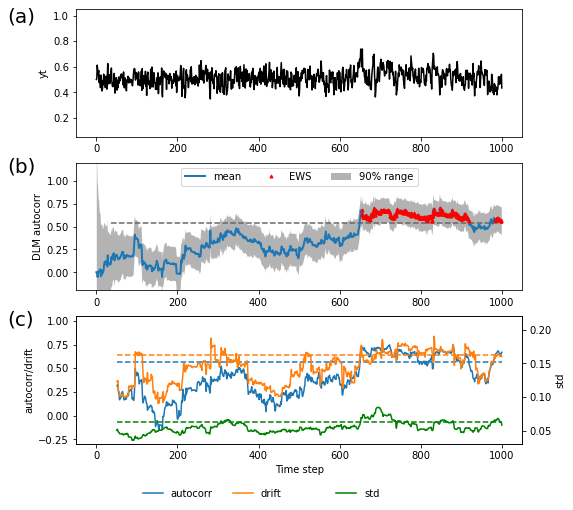

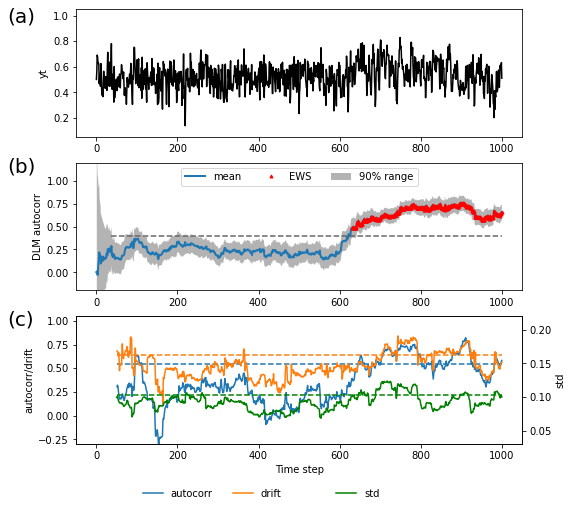

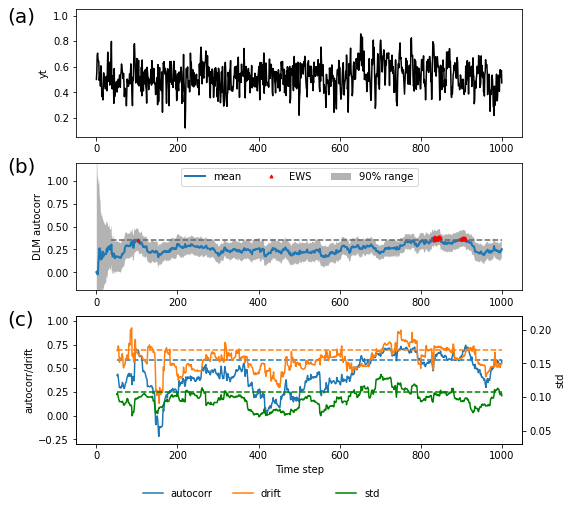

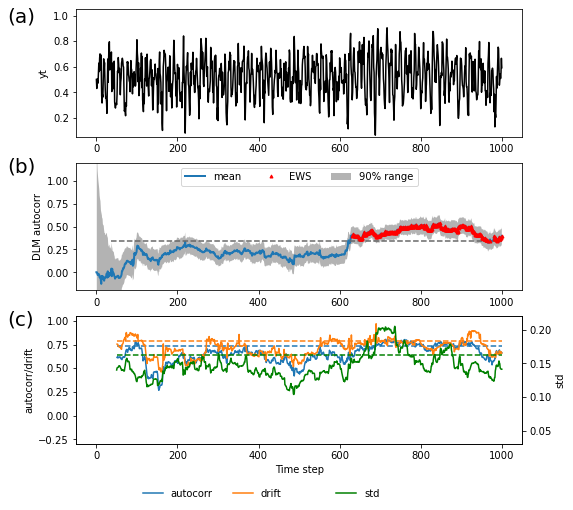

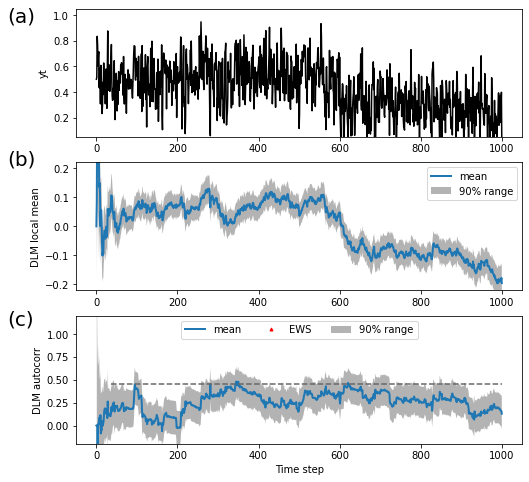

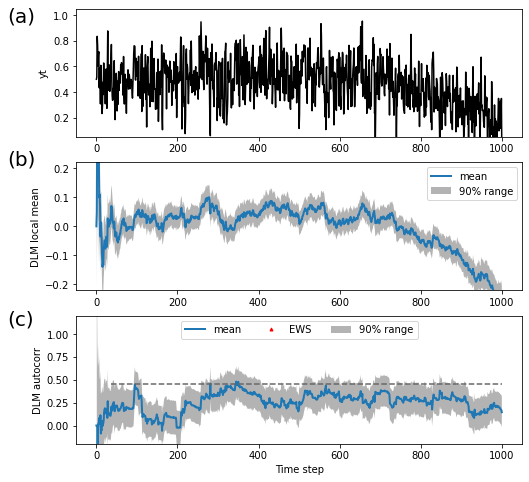

In [1]:
import numpy as np
from numpy import matlib as mb
from dlm_functions import forwardFilteringM, Model, plotThFig,plotThFig2

TimeofChange = 600
dd = 0.98
x0 = 0.5 
N = 1000

#%% non-linear dynamics with white noise
np.random.seed(88) 
a = 0.5
b = 4
gamma = 0.2

print('Exp. 1: theoretical AC: %.3f' % np.exp(-gamma*(b-a)))

X = np.array([x0])
for i in range(N):
    xt = X[-1]
    if i<TimeofChange:
        b = 4
    else:
        b = 2
    dx = gamma*(xt-a)*(xt-b)
    noise = 0.05*np.random.normal(0,1)
    X = np.concatenate([X,[xt+dx+noise]])

rseas = []
meanX = np.mean(X); X = X-meanX
Y = X[1:]
XX = np.column_stack(([X[:-1]]))
M = Model(Y,XX,rseas,dd)
FF = forwardFilteringM(M)

plotThFig(FF,X,meanX)

#%% non-linear dynamics with random forcing and white noise
np.random.seed(88) 
a = 0.5
b = 4
gamma = 0.2
print('Exp. 2')

X = np.array([x0])
Forcing = 0.07*np.random.normal(0,1,N)
Noise = 0.05*np.random.normal(0,1,N)
np.random.seed(11) # 88
for i in range(N):
    xt = X[-1]
    if i<TimeofChange:
        b = 4
    else:
        b = 2
    dx = gamma*(xt-a)*(xt-b)
    X = np.concatenate([X,[xt+dx+Noise[i]+Forcing[i]]])


rseas = []
meanX = np.mean(X); X = X-meanX
Y = X[1:]
XX = np.column_stack(([X[:-1],Forcing]))
M = Model(Y,XX,rseas,dd)
FF = forwardFilteringM(M)

plotThFig(FF,X,meanX)


#%% non-linear dynamics with auto-correlated forcing and white noise
np.random.seed(88) 
a = 0.5
b = 4
print('Exp. 3')

X = np.array([x0])
eps = 0.07*np.random.normal(0,1,N)
Forcing = np.zeros(eps.shape)
Noise = 0.05*np.random.normal(0,1,N)
np.random.seed(11) # 88
for i in range(N):
    xt = X[-1]
    if i<TimeofChange:
        b = 4
        forcingac = 0.2
    else:
        b = 4
        forcingac = 0.6
    if i>0:
        Forcing[i] = eps[i]+ Forcing[i-1]*forcingac
    dx = gamma*(xt-a)*(xt-b)
    X = np.concatenate([X,[xt+dx+Noise[i]+Forcing[i]]])



rseas = []; 
meanX = np.mean(X); X = X-meanX
Y = X[1:]
XX = np.column_stack(([X[:-1],Forcing]))
M = Model(Y,XX,rseas,dd)
FF = forwardFilteringM(M)

plotThFig(FF,X,meanX)

#%% non-linear dynamics with seasonal component in Y, random forcing
np.random.seed(88) 
a = 0.5
b = 4
gamma = 0.2
AC = np.exp(-gamma*(b-a))
print('Exp. 4')

period = 365.25/16

X = np.array([x0])
Forcing = 0.07*np.random.normal(0,1,N)
Noise = 0.05*np.random.normal(0,1,N)
Seas = [0.05*np.sin(2*np.pi/period*(i-6))+0.1*np.sin(2*np.pi/(period/2)*(i-4)) for i in range(N)]
np.random.seed(11) # 88
for i in range(N):
    xt = X[-1]
    if i<TimeofChange:
        b = 4
    else:
        b = 3
    dx = gamma*(xt-a)*(xt-b)
    X = np.concatenate([X,[xt+dx+Noise[i]+Forcing[i]+Seas[i]]])



rseas = [1,2]
meanX = np.mean(X); X = X-meanX
Y = X[1:]
XX = np.column_stack(([X[:-1],Forcing]))
M = Model(Y,XX,rseas,dd)
FF = forwardFilteringM(M)

plotThFig(FF,X,meanX)


#%% non-linear dynamics with sudden decrease in Y, random forcing
np.random.seed(88) 
a = 0.5
b = 4
gamma = 0.2
print('Exp. 5')

X = np.array([x0])
Noise = 0.15*np.random.normal(0,1,N)
delta = 0.25

for i in range(N):
    xt = X[-1]
    if i<TimeofChange:
        dx = gamma*(xt-a)*(xt-b)
    else:
        dx = gamma*(xt-(a-delta))*(xt-(b-delta))

    X = np.concatenate([X,[xt+dx+Noise[i]]])

rseas = []
meanX = np.mean(X); X = X-meanX
Y = X[1:]
XX = np.column_stack(([X[:-1]]))
M = Model(Y,XX,rseas,dd)
FF = forwardFilteringM(M)

warmup = int(24*1.5)
quantile = 0.90

plotThFig2(FF,X,meanX)


#%% non-linear dynamics with a decreasing trend in Y, random forcing
np.random.seed(88) 
a = 0.5
b = 4
gamma = 0.2
print('Exp. 6')

X = np.array([x0])
Noise = 0.15*np.random.normal(0,1,N)
deltaN = N-TimeofChange
delta = 0.3/deltaN

for i in range(N):
    xt = X[-1]
    if i<TimeofChange:
        dx = gamma*(xt-a)*(xt-b)
    else:
        dx = gamma*(xt-(a-delta*(i-TimeofChange)))*(xt-(b-delta*(i-TimeofChange)))

    X = np.concatenate([X,[xt+dx+Noise[i]]])


rseas = []
meanX = np.mean(X); X = X-meanX
Y = X[1:]
XX = np.column_stack(([X[:-1]]))
M = Model(Y,XX,rseas,dd)
FF = forwardFilteringM(M)

plotThFig2(FF,X,meanX)
